# Building Neural Network using NN module



<img src="mlp_mnist.png" width=600px>

> **Exercise:** Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the `nn.ReLU` module or `F.relu` function.

In [29]:
### Run this cell
import torch.nn.functional as F
from torch import nn
import torch

from torchvision import datasets, transforms

# Define a transform to normalize the data
#transforms.Compose just clubs all the transforms provided to it
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [30]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        #the self.hidden1 = nn.Linear(784, 256) defines a hidden,#fully connected linear layer, 
        #which takes input x of shape (batch_size, 784), where batch size is the number of inputs (each of size 784) which are passed to the network at once (as a single tensor), 
        #and transforms it by the linear equation y = x*W^T + b into a tensor y of shape (batch_size, 128)
        self.hidden1 = nn.Linear(784, 128)

        self.hidden2 = nn.Linear(128, 64)

        self.output = nn.Linear(64,10)
    
    def forward(self, X):
        
        X = self.hidden1(X)
        X = F.relu(X)
        X = self.hidden2(X)
        X = F.relu(X)
        X = self.output(X)
        X = F.softmax(X)

        return X
    

In [3]:
model = Network()

model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [4]:
print(model.hidden1.weight)
print(model.hidden2.weight)

Parameter containing:
tensor([[-0.0332,  0.0053,  0.0012,  ...,  0.0164, -0.0238,  0.0225],
        [ 0.0275,  0.0272, -0.0083,  ..., -0.0182, -0.0014, -0.0307],
        [-0.0139,  0.0270,  0.0116,  ...,  0.0320, -0.0094, -0.0241],
        ...,
        [ 0.0308, -0.0288,  0.0031,  ..., -0.0085, -0.0151,  0.0184],
        [-0.0195, -0.0072,  0.0347,  ..., -0.0238, -0.0289, -0.0052],
        [ 0.0059, -0.0077, -0.0094,  ...,  0.0084, -0.0293,  0.0228]],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0754, -0.0850, -0.0268,  ..., -0.0417,  0.0782, -0.0678],
        [-0.0316,  0.0556, -0.0071,  ..., -0.0494,  0.0373, -0.0214],
        [ 0.0591, -0.0603,  0.0797,  ...,  0.0243,  0.0516, -0.0046],
        ...,
        [-0.0237,  0.0657,  0.0228,  ..., -0.0854,  0.0457,  0.0466],
        [ 0.0678,  0.0230,  0.0572,  ...,  0.0136, -0.0741,  0.0388],
        [ 0.0389,  0.0548,  0.0777,  ...,  0.0131,  0.0401,  0.0756]],
       requires_grad=True)


In [5]:
#Setting biases to all zeros
model.hidden1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

# Forward Pass

In [6]:
# Get some data
dataiter = iter(trainloader)
images, label = dataiter.next()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


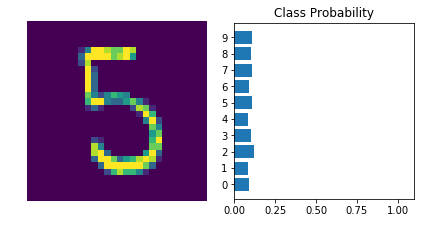

In [17]:
import helper

images.resize_(64, 1, 784)
img_idx = 3
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1,28,28), ps)

# Using nn.Sequential

In [18]:
# Hyperparameters for network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.Softmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


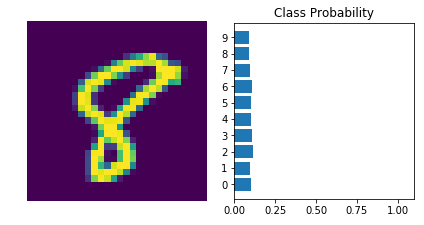

In [24]:
# Forward pass through the network and display output

images, label = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
helper.view_classify(images[3].view(1,28,28), ps)

In [26]:
print(model[0])
#model[0].weight

Linear(in_features=784, out_features=128, bias=True)


You can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so _each operation must have a different name_.

In [27]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [28]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
